In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

np.set_printoptions(threshold=np.inf)

In [32]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [34]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Print the null values % of each column

In [35]:
for col in data.columns:
    print(col, ": ", data[col].isna().sum()/len(data[col]))

Id :  0.0
MSSubClass :  0.0
MSZoning :  0.0
LotFrontage :  0.1773972602739726
LotArea :  0.0
Street :  0.0
Alley :  0.9376712328767123
LotShape :  0.0
LandContour :  0.0
Utilities :  0.0
LotConfig :  0.0
LandSlope :  0.0
Neighborhood :  0.0
Condition1 :  0.0
Condition2 :  0.0
BldgType :  0.0
HouseStyle :  0.0
OverallQual :  0.0
OverallCond :  0.0
YearBuilt :  0.0
YearRemodAdd :  0.0
RoofStyle :  0.0
RoofMatl :  0.0
Exterior1st :  0.0
Exterior2nd :  0.0
MasVnrType :  0.005479452054794521
MasVnrArea :  0.005479452054794521
ExterQual :  0.0
ExterCond :  0.0
Foundation :  0.0
BsmtQual :  0.025342465753424658
BsmtCond :  0.025342465753424658
BsmtExposure :  0.026027397260273973
BsmtFinType1 :  0.025342465753424658
BsmtFinSF1 :  0.0
BsmtFinType2 :  0.026027397260273973
BsmtFinSF2 :  0.0
BsmtUnfSF :  0.0
TotalBsmtSF :  0.0
Heating :  0.0
HeatingQC :  0.0
CentralAir :  0.0
Electrical :  0.0006849315068493151
1stFlrSF :  0.0
2ndFlrSF :  0.0
LowQualFinSF :  0.0
GrLivArea :  0.0
BsmtFullBath :  0

## Find the columns with more than 90% null values

In [36]:
null_columns = [col for col in data.columns if data[col].isna().sum()/len(data[col]) > 0.90]
print(null_columns)

['Alley', 'PoolQC', 'MiscFeature']


## Drop null columns from data frame

In [37]:
data = data.drop(null_columns, axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


## Drop `ID` column

In [38]:
data = data.drop(["Id"], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


# Replace all numeric missing values with average value 

In [39]:
numeric_columns = data.select_dtypes(include='number').columns

In [40]:
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


# Convert categorical variable to numeric variables 

In [41]:
categorical_columns = data.select_dtypes(include='object').columns
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [42]:
for col in categorical_columns:
    label = LabelEncoder()
    label.fit(list(data[col].values))
    data[col] = label.transform(list(data[col].values))

## Find highly correlated values to the salesPrice

In [43]:
corr_mat = data.corr()
k = 15
top_corr_cols = corr_mat.nlargest(k, "SalePrice")["SalePrice"].index
top_corr_cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

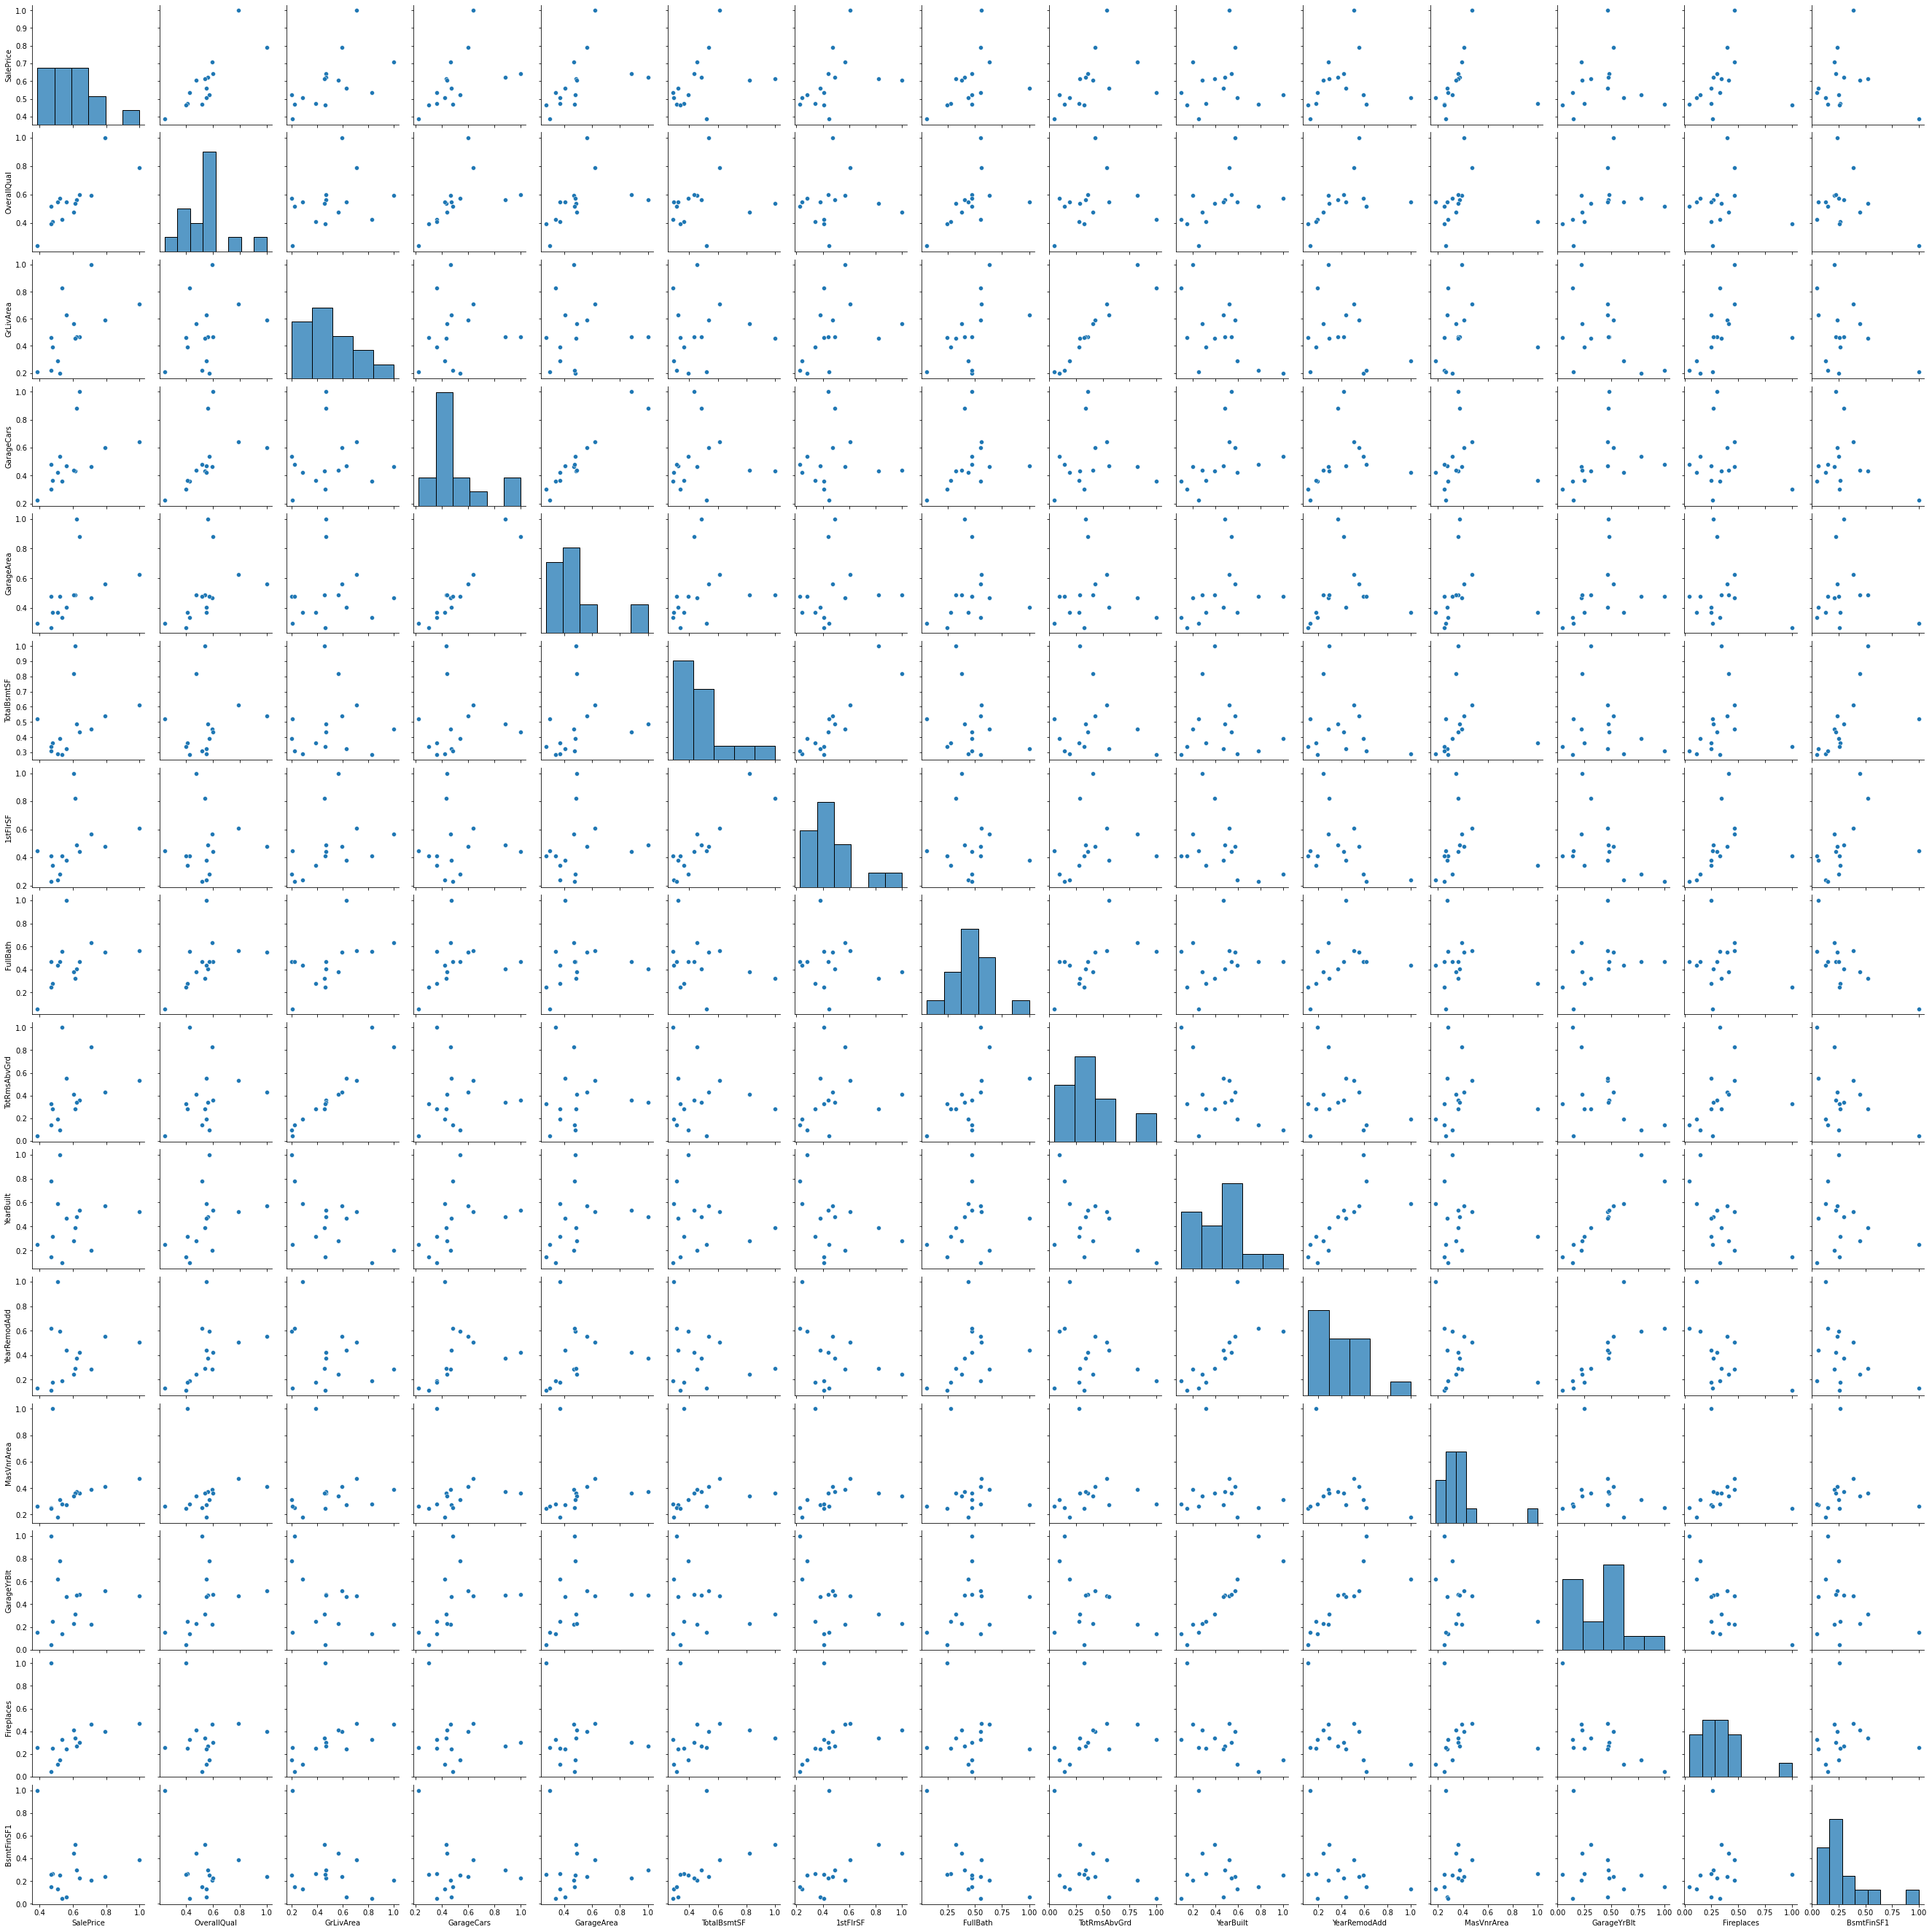

In [65]:
sns.pairplot(data[top_corr_cols].corr())

## Split the data in test and train set

In [44]:
processed_data_train, processed_data_test = train_test_split(data, test_size=0.25, random_state=100)

In [45]:
processed_data_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
774,20,3,110.000000,14226,1,3,3,0,0,0,...,0,0,0,4,0,7,2007,6,5,395000
92,30,3,80.000000,13360,1,0,1,0,4,0,...,0,0,0,4,0,8,2009,8,4,163500
360,85,3,70.049958,7540,1,0,3,0,1,0,...,0,192,0,2,0,6,2007,8,4,156000
549,60,1,75.000000,9375,1,3,3,0,4,0,...,0,0,0,4,0,11,2009,8,4,263000
546,50,3,70.000000,8737,1,0,0,0,4,0,...,144,0,0,4,0,5,2007,8,4,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,60,3,63.000000,8199,1,3,3,0,4,0,...,0,0,0,4,0,10,2008,8,4,189000
53,20,3,68.000000,50271,1,0,2,0,4,0,...,0,0,0,4,0,11,2006,8,4,385000
350,120,3,68.000000,7820,1,0,3,0,4,0,...,0,0,0,4,0,12,2007,6,5,318061
79,50,4,60.000000,10440,1,3,3,0,0,0,...,0,0,0,2,0,5,2009,8,4,110000


## Scale the data using MinMaxScaler

In [46]:
scaler = MinMaxScaler()
processed_data_train[top_corr_cols] = scaler.fit_transform(processed_data_train[top_corr_cols])
processed_data_train[top_corr_cols]

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
774,0.500069,0.777778,0.294965,0.75,0.631171,0.316694,0.370602,0.666667,0.545455,0.971014,0.933333,0.234375,0.963636,0.333333,0.000000
92,0.178586,0.444444,0.101076,0.50,0.304654,0.143372,0.137037,0.333333,0.181818,0.355072,0.933333,0.000000,0.190909,0.000000,0.126329
360,0.168171,0.555556,0.091084,0.50,0.331453,0.145336,0.125000,0.333333,0.181818,0.768116,0.466667,0.000000,0.709091,0.333333,0.136960
549,0.316762,0.666667,0.318217,0.50,0.433709,0.149264,0.125000,0.666667,0.454545,0.949275,0.900000,0.000000,0.936364,0.333333,0.000000
546,0.243161,0.555556,0.230015,0.50,0.310296,0.174304,0.125694,0.333333,0.272727,0.369565,0.000000,0.000000,0.454545,0.333333,0.053154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.213998,0.666667,0.195619,0.50,0.289140,0.119149,0.082407,0.666667,0.363636,0.963768,0.916667,0.000000,0.954545,0.333333,0.114812
53,0.486182,0.888889,0.269792,0.75,0.630465,0.301473,0.340278,0.000000,0.181818,0.789855,0.616667,0.000000,0.736364,0.333333,0.320695
350,0.393225,0.888889,0.274981,0.50,0.435120,0.305892,0.346528,0.666667,0.272727,0.978261,0.950000,0.226250,0.972727,0.333333,0.000000
79,0.104291,0.444444,0.152191,0.50,0.310296,0.072013,0.071759,0.333333,0.181818,0.275362,0.516667,0.000000,0.600000,0.000000,0.000000


In [47]:
X_train = processed_data_train[top_corr_cols]
y_train = X_train.pop("SalePrice")
X_train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
774,0.777778,0.294965,0.75,0.631171,0.316694,0.370602,0.666667,0.545455,0.971014,0.933333,0.234375,0.963636,0.333333,0.000000
92,0.444444,0.101076,0.50,0.304654,0.143372,0.137037,0.333333,0.181818,0.355072,0.933333,0.000000,0.190909,0.000000,0.126329
360,0.555556,0.091084,0.50,0.331453,0.145336,0.125000,0.333333,0.181818,0.768116,0.466667,0.000000,0.709091,0.333333,0.136960
549,0.666667,0.318217,0.50,0.433709,0.149264,0.125000,0.666667,0.454545,0.949275,0.900000,0.000000,0.936364,0.333333,0.000000
546,0.555556,0.230015,0.50,0.310296,0.174304,0.125694,0.333333,0.272727,0.369565,0.000000,0.000000,0.454545,0.333333,0.053154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.666667,0.195619,0.50,0.289140,0.119149,0.082407,0.666667,0.363636,0.963768,0.916667,0.000000,0.954545,0.333333,0.114812
53,0.888889,0.269792,0.75,0.630465,0.301473,0.340278,0.000000,0.181818,0.789855,0.616667,0.000000,0.736364,0.333333,0.320695
350,0.888889,0.274981,0.50,0.435120,0.305892,0.346528,0.666667,0.272727,0.978261,0.950000,0.226250,0.972727,0.333333,0.000000
79,0.444444,0.152191,0.50,0.310296,0.072013,0.071759,0.333333,0.181818,0.275362,0.516667,0.000000,0.600000,0.000000,0.000000


## Transform the test data

In [48]:
processed_data_test[top_corr_cols] = scaler.transform(processed_data_test[top_corr_cols])
processed_data_test[top_corr_cols]

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
1436,0.118872,0.333333,0.081860,0.50,0.372355,0.141408,0.113889,0.333333,0.181818,0.717391,0.350000,0.00000,0.672727,0.000000,0.109142
57,0.224413,0.666667,0.246349,0.50,0.398449,0.140753,0.112963,0.666667,0.363636,0.956522,0.900000,0.00000,0.945455,0.000000,0.000000
780,0.195945,0.666667,0.156610,0.50,0.283498,0.202455,0.203935,0.666667,0.272727,0.891304,0.766667,0.02375,0.863636,0.333333,0.000000
382,0.248021,0.666667,0.261145,0.50,0.450635,0.153682,0.131250,0.666667,0.454545,0.971014,0.933333,0.00000,0.963636,0.000000,0.000000
1170,0.189002,0.555556,0.130669,0.25,0.252468,0.179378,0.172685,0.333333,0.272727,0.760870,0.450000,0.00000,0.700000,0.333333,0.092488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.044577,0.444444,0.122790,0.25,0.238364,0.157283,0.163194,0.333333,0.272727,0.347826,0.000000,0.00000,0.181818,0.000000,0.000000
165,0.128593,0.444444,0.176211,0.00,0.000000,0.105401,0.100926,0.666667,0.272727,0.492754,0.816667,0.00000,0.713692,0.000000,0.062190
213,0.168171,0.444444,0.106072,0.50,0.406206,0.162029,0.143056,0.333333,0.181818,0.891304,0.750000,0.00000,0.872727,0.000000,0.126860
950,0.130676,0.444444,0.081860,0.50,0.507757,0.141408,0.113889,0.333333,0.181818,0.565217,0.866667,0.00000,0.727273,0.000000,0.070517


In [49]:
X_test = processed_data_test[top_corr_cols]
y_test = X_test.pop("SalePrice")
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
1436,0.333333,0.081860,0.50,0.372355,0.141408,0.113889,0.333333,0.181818,0.717391,0.350000,0.00000,0.672727,0.000000,0.109142
57,0.666667,0.246349,0.50,0.398449,0.140753,0.112963,0.666667,0.363636,0.956522,0.900000,0.00000,0.945455,0.000000,0.000000
780,0.666667,0.156610,0.50,0.283498,0.202455,0.203935,0.666667,0.272727,0.891304,0.766667,0.02375,0.863636,0.333333,0.000000
382,0.666667,0.261145,0.50,0.450635,0.153682,0.131250,0.666667,0.454545,0.971014,0.933333,0.00000,0.963636,0.000000,0.000000
1170,0.555556,0.130669,0.25,0.252468,0.179378,0.172685,0.333333,0.272727,0.760870,0.450000,0.00000,0.700000,0.333333,0.092488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.444444,0.122790,0.25,0.238364,0.157283,0.163194,0.333333,0.272727,0.347826,0.000000,0.00000,0.181818,0.000000,0.000000
165,0.444444,0.176211,0.00,0.000000,0.105401,0.100926,0.666667,0.272727,0.492754,0.816667,0.00000,0.713692,0.000000,0.062190
213,0.444444,0.106072,0.50,0.406206,0.162029,0.143056,0.333333,0.181818,0.891304,0.750000,0.00000,0.872727,0.000000,0.126860
950,0.444444,0.081860,0.50,0.507757,0.141408,0.113889,0.333333,0.181818,0.565217,0.866667,0.00000,0.727273,0.000000,0.070517


In [54]:
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
1436,0.333333,0.081860,0.50,0.372355,0.141408,0.113889,0.333333,0.181818,0.717391,0.350000,0.00000,0.672727,0.000000,0.109142
57,0.666667,0.246349,0.50,0.398449,0.140753,0.112963,0.666667,0.363636,0.956522,0.900000,0.00000,0.945455,0.000000,0.000000
780,0.666667,0.156610,0.50,0.283498,0.202455,0.203935,0.666667,0.272727,0.891304,0.766667,0.02375,0.863636,0.333333,0.000000
382,0.666667,0.261145,0.50,0.450635,0.153682,0.131250,0.666667,0.454545,0.971014,0.933333,0.00000,0.963636,0.000000,0.000000
1170,0.555556,0.130669,0.25,0.252468,0.179378,0.172685,0.333333,0.272727,0.760870,0.450000,0.00000,0.700000,0.333333,0.092488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.444444,0.122790,0.25,0.238364,0.157283,0.163194,0.333333,0.272727,0.347826,0.000000,0.00000,0.181818,0.000000,0.000000
165,0.444444,0.176211,0.00,0.000000,0.105401,0.100926,0.666667,0.272727,0.492754,0.816667,0.00000,0.713692,0.000000,0.062190
213,0.444444,0.106072,0.50,0.406206,0.162029,0.143056,0.333333,0.181818,0.891304,0.750000,0.00000,0.872727,0.000000,0.126860
950,0.444444,0.081860,0.50,0.507757,0.141408,0.113889,0.333333,0.181818,0.565217,0.866667,0.00000,0.727273,0.000000,0.070517


## Ridge Regression

In [56]:
lambdas = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
for i in lambdas: 
    
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_train, y_train) # fit the model on the polynomial features
    
    #Computing the r2 score
    y_pred = ridgereg.predict(X_test)
    print(i,"->", str(r2_score(y_test, y_pred)), ridgereg.coef_)
    

0 -> 0.8121762081533024 [ 0.22741293  0.28615695  0.05977363  0.0210227   0.0917736   0.05984515
 -0.00995184  0.01192009  0.03624939  0.02948158  0.0613484   0.00837197
  0.03885201  0.11945177]
1e-05 -> 0.812176183565211 [ 0.22741289  0.28615587  0.05977353  0.0210229   0.09177345  0.05984539
 -0.00995171  0.01192051  0.03624936  0.0294816   0.06134847  0.00837197
  0.0388521   0.1194517 ]
0.0001 -> 0.8121759622561024 [ 0.22741254  0.28614611  0.05977263  0.02102467  0.09177213  0.05984757
 -0.00995054  0.01192426  0.03624906  0.02948182  0.06134908  0.008372
  0.03885285  0.11945106]
0.001 -> 0.8121737475542855 [ 0.22740904  0.28604859  0.05976366  0.02104235  0.09175892  0.05986928
 -0.00993882  0.01196172  0.03624611  0.02948396  0.06135522  0.00837227
  0.0388604   0.11944473]
0.01 -> 0.81215144108189 [ 0.22737334  0.28507871  0.05967445  0.02121844  0.09162836  0.06008441
 -0.00982203  0.01233417  0.03621689  0.02950537  0.0614163   0.00837501
  0.03893569  0.11938098]
0.1 -> 0.

### Optimal value of lambda for `Ridge` regression is `0.1`
### Let's double it and see the model performance

In [66]:
ridgereg = Ridge(alpha = 0.2) # Initialize the Ridge Regression model with a specific lambda
ridgereg.fit(X_train, y_train) # fit the model on the polynomial features

#Computing the r2 score
y_pred = ridgereg.predict(X_test)

print(ridgereg.coef_)
print("R2: ", r2_score(y_test, y_pred))
print("RSS: ", np.sum(np.square(y_pred - y_test)))
mse =  mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**0.5)

[ 0.22638285  0.26664091  0.05800702  0.02461976  0.08941947  0.06392306
 -0.00753114  0.01937559  0.03569397  0.02993832  0.06257422  0.00843861
  0.04043918  0.11789976]
R2:  0.811624611086211
RSS:  0.8863241748758974
MSE:  0.002428285410618897
RMSE:  0.0492776360088316


# Lasso Regression

In [59]:
lambdas = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    lasso_reg = Lasso(alpha = i)
    lasso_reg.fit(X_train, y_train)
    
    # Compute the r2 score
    y_pred = lasso_reg.predict(X_test)
    print(i, "->", r2_score(y_test, y_pred))

0 -> 0.8121762081533022
1e-05 -> 0.8119628652720264
0.0001 -> 0.8098231348708538
0.001 -> 0.7754517950045478
0.01 -> 0.26320753592610746
0.1 -> -0.0001954833116768473
1 -> -0.0001954833116768473
10 -> -0.0001954833116768473
100 -> -0.0001954833116768473
1000 -> -0.0001954833116768473


/var/folders/wc/s5jc1qxj0ksc58r77p3225n00000gn/T/ipykernel_5204/1081270254.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(X_train, y_train)
/Users/i550019/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/i550019/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.434e+00, tolerance: 1.305e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

### Optimal value of lambda for `Lasso` regression is `0.00001`
### Let's doulble it and see the model performance

In [68]:
lasso_reg = Lasso(alpha = 0.00002)
lasso_reg.fit(X_train, y_train)

# Compute the r2 score
y_pred = lasso_reg.predict(X_test)

print(lasso_reg.coef_)
print("R2: ", r2_score(y_test, y_pred))
print("RSS: ", np.sum(np.square(y_pred - y_test)))
mse =  mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**0.5)

[ 0.22762943  0.28308839  0.05936688  0.02173908  0.0893614   0.0601774
 -0.00734133  0.01120989  0.03594461  0.02950013  0.06083184  0.00774219
  0.03907519  0.11828552]
R2:  0.8117453465502075
RSS:  0.8857561030002556
MSE:  0.0024267290493157688
RMSE:  0.04926184171664483
